In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
plt.style.use('ggplot')

In [129]:
aus_production = pd.read_csv('fpppy_data/data/aus_production.csv')
bricks = aus_production.filter(['ds', 'Bricks']).copy()
bricks['ds'] = pd.to_datetime(bricks['ds'])
bricks = bricks.set_index('ds')

pelt = pd.read_csv('fpppy_data/data/pelt.csv')
lynx = pelt.query('unique_id == "lynx"').filter(['ds', 'y'])
lynx['ds'] = pd.to_datetime(lynx['ds'])
lynx = lynx.set_index('ds')

gafa_stock = pd.read_csv('fpppy_data/data/gafa_stock.csv')
goog_close = gafa_stock.query('unique_id == "GOOG_Close"').filter(['ds', 'y'])
goog_close['ds'] = pd.to_datetime(goog_close['ds'])
goog_close = goog_close.set_index('ds')

vic_elec = pd.read_csv('fpppy_data/data/vic_elec.csv')
demand = vic_elec.query('unique_id == "Demand"').filter(['ds', 'y'])
demand['ds'] = pd.to_datetime(demand['ds'])
demand = demand.set_index('ds')

dfs = [bricks, lynx, goog_close, demand]

In [130]:
for df in dfs:
    print(df.info())
    print('***')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 1956-01-01 to 2010-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bricks  198 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB
None
***
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 1845-01-01 to 1935-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       91 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB
None
***
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None
***
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52602 entries, 2012-01-01 00:00:00 to 2014-12-31 23:30:00
Data columns (total 1 columns):
 #   Column  No

In [131]:
for df in dfs:
    print(df.head())
    print('***')

            Bricks
ds                
1956-01-01   189.0
1956-04-01   204.0
1956-07-01   208.0
1956-10-01   197.0
1957-01-01   187.0
***
                y
ds               
1845-01-01  30090
1846-01-01  45150
1847-01-01  49150
1848-01-01  39520
1849-01-01  21230
***
                     y
ds                    
2014-01-02  552.963501
2014-01-03  548.929749
2014-01-06  555.049927
2014-01-07  565.750366
2014-01-08  566.927673
***
                               y
ds                              
2012-01-01 00:00:00  4382.825174
2012-01-01 00:30:00  4263.365526
2012-01-01 01:00:00  4048.966046
2012-01-01 01:30:00  3877.563330
2012-01-01 02:00:00  4036.229746
***


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')


ConversionError: Failed to convert value(s) to axis units: DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')

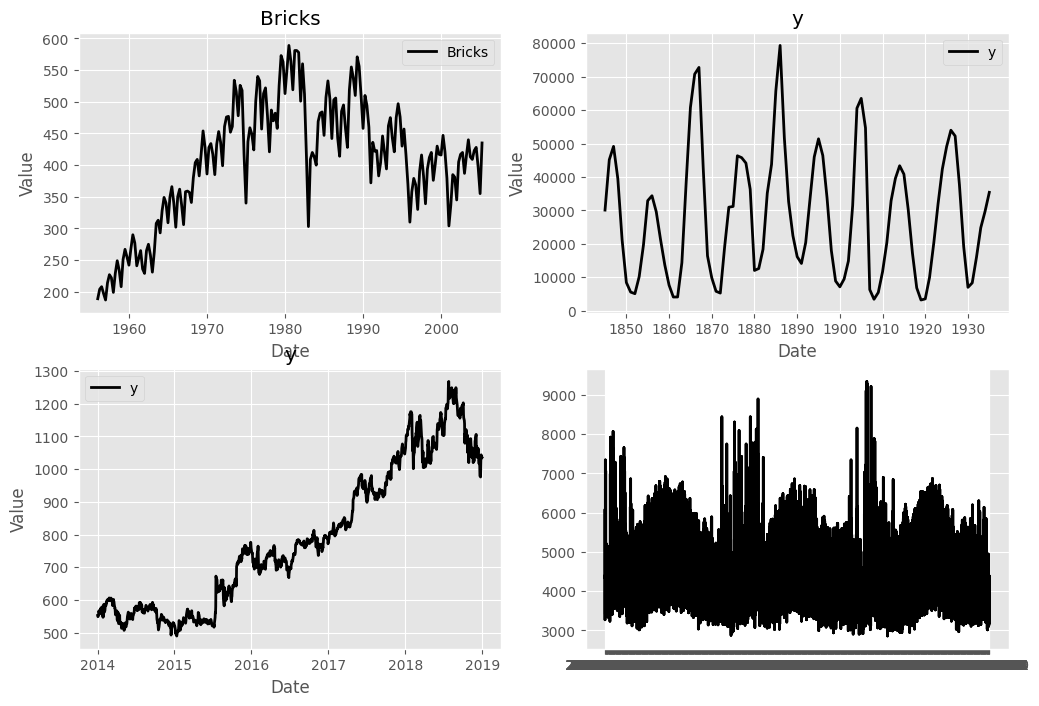

In [132]:
a = np.arange(len(dfs))
shape = np.reshape(a, (-1, 2)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))

for idx, df in enumerate(dfs):
    ax = axes[indices[idx]]

    if idx == len(dfs) - 1:
        df.index = df.index.to_period('D').strftime('%Y-%m-%d')
    ax.plot(df.index, df.values, label=df.columns[0], c='k', lw=2)

    if idx == len(dfs) - 1:
        date_range = pd.date_range(df.index.min(), df.index.max(), freq='D')
        date_labels = df.index.unique()
        print(date_range)
        ax.set_xticks(ticks=date_range, labels=date_labels, rotation=90)

    ax.set_title(df.columns[0])
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.suptitle('Time Series Data')
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

In [18]:
gafa_stock = pd.read_csv('fpppy_data/data/gafa_stock.csv')
stock_close = [unique_id for unique_id in gafa_stock['unique_id'].unique() if unique_id.endswith('Close') and not unique_id.endswith('Adj_Close')]

In [26]:
for sc in stock_close:
    df = gafa_stock.query(f'unique_id == "{sc}"')
    max_close = df.filter(['y']).max()['y']
    print(sc, '---->', df.query(f'y == {max_close}').filter(['ds']).values[0][0])

AAPL_Close ----> 2018-10-03
AMZN_Close ----> 2018-09-04
FB_Close ----> 2018-07-25
GOOG_Close ----> 2018-07-26


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
plt.style.use('ggplot')

In [29]:
tute1 = pd.read_csv('fpppy_data/data/tute1.csv')
tute1.head()

Quarter   Sales  AdBudget    GDP
0  1981-03-01  1020.2     659.2  251.8
1  1981-06-01   889.2     589.0  290.9
2  1981-09-01   795.0     512.5  290.8
3  1981-12-01  1003.9     614.1  292.4
4  1982-03-01  1057.7     647.2  279.1

In [30]:
tute1['Quarter'] = pd.to_datetime(tute1['Quarter'])
tute1 = tute1.set_index('Quarter')
tute1.head()

Sales  AdBudget    GDP
Quarter                            
1981-03-01  1020.2     659.2  251.8
1981-06-01   889.2     589.0  290.9
1981-09-01   795.0     512.5  290.8
1981-12-01  1003.9     614.1  292.4
1982-03-01  1057.7     647.2  279.1

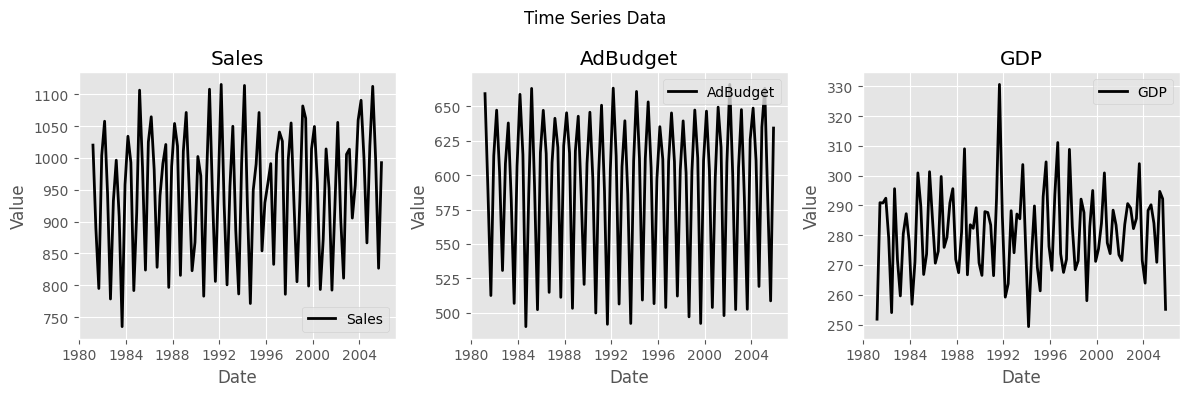

In [43]:
a = np.arange(tute1.shape[1])
shape = np.reshape(a, (-1, 3)).shape

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 4))

for idx, col in enumerate(tute1.columns):
    ax = axes[idx]
    ax.plot(tute1.index, tute1[col], label=col, c='k', lw=2)
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.suptitle('Time Series Data')
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
plt.style.use('ggplot')

In [48]:
us_total = pd.read_csv('fpppy_data/data/us_total.csv')
us_total = us_total.set_index('ds')
us_total.head()

unique_id       y
ds                    
1997   Alabama  324158
1998   Alabama  329134
1999   Alabama  337270
2000   Alabama  353614
2001   Alabama  332693

In [57]:
us_total['unique_id'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Federal Offshore -- Gulf of Mexico', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'U.S.', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
new_england = ['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Connecticut' ,'Rhode Island']
a = np.arange(len(new_england))
shape = np.reshape(a, (2, -1)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))

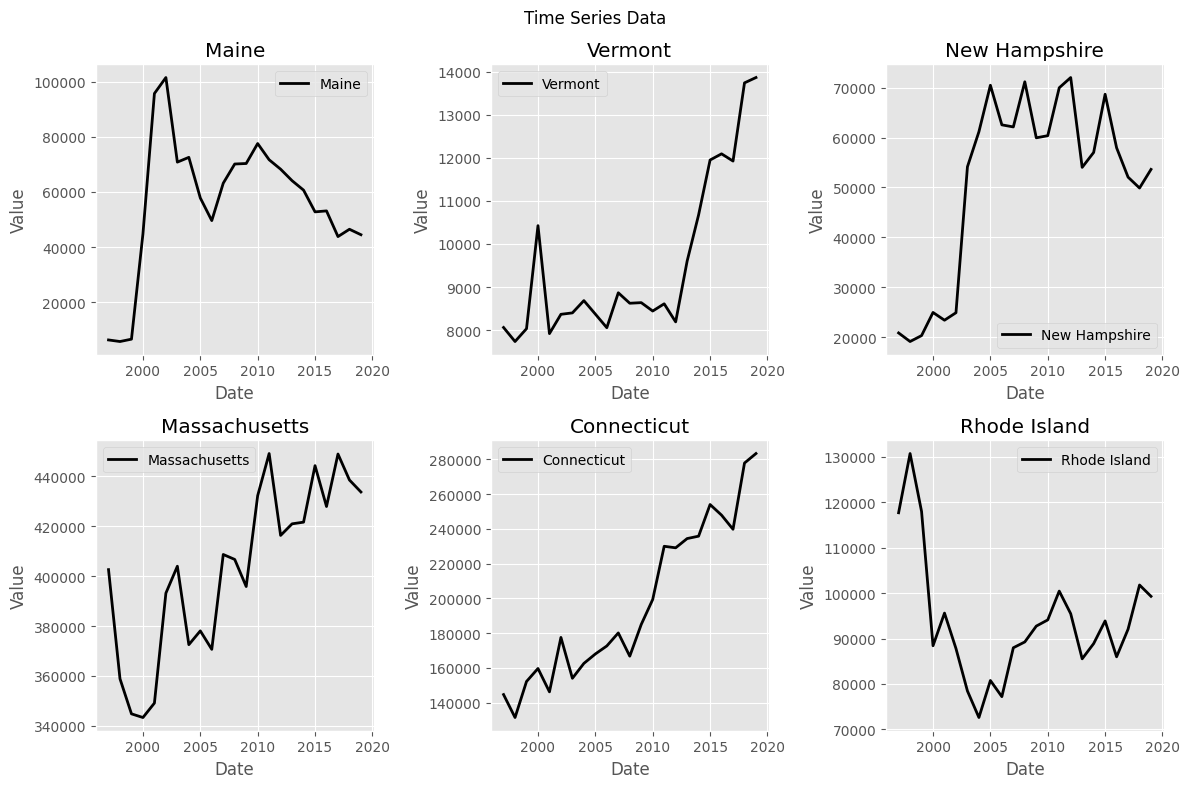

In [63]:
fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))

for idx, state in enumerate(new_england):
    ax = axes[indices[idx]]
    df = us_total.query(f'unique_id == "{state}"').filter(['y'])
    ax.plot(df.index, df, label=state, c='k', lw=2)
    ax.set_title(state)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.suptitle('Time Series Data')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

In [24]:
tourism = pd.read_csv('fpppy_data/data/tourism.csv')
tourism.head()

ds    Region            State   Purpose           y
0  1998-01-01  Adelaide  South Australia  Business  135.077690
1  1998-04-01  Adelaide  South Australia  Business  109.987316
2  1998-07-01  Adelaide  South Australia  Business  166.034687
3  1998-10-01  Adelaide  South Australia  Business  127.160464
4  1999-01-01  Adelaide  South Australia  Business  137.448533

In [30]:
tourism.groupby(['Region', 'Purpose'], as_index=False)[['y']].count()

Region   Purpose   y
0           Adelaide  Business  80
1           Adelaide   Holiday  80
2           Adelaide     Other  80
3           Adelaide  Visiting  80
4     Adelaide Hills  Business  80
..               ...       ...  ..
299          Wimmera  Visiting  80
300  Yorke Peninsula  Business  80
301  Yorke Peninsula   Holiday  80
302  Yorke Peninsula     Other  80
303  Yorke Peninsula  Visiting  80

[304 rows x 3 columns]

In [34]:
df = tourism.groupby(['State'], as_index=False)[['y']].count()
df

State     y
0                 ACT   320
1     New South Wales  4160
2  Northern Territory  2240
3          Queensland  3840
4     South Australia  3840
5            Tasmania  1600
6            Victoria  6720
7   Western Australia  1600

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
plt.style.use('ggplot')

In [64]:
aus_arrivals = pd.read_csv('fpppy_data/data/aus_arrivals.csv')
aus_arrivals.head()

Quarter Origin  Arrivals
0  1981-01-01  Japan     14763
1  1981-04-01  Japan      9321
2  1981-07-01  Japan     10166
3  1981-10-01  Japan     19509
4  1982-01-01  Japan     17117

In [65]:
origin = aus_arrivals['Origin'].unique()
cmap = plt.cm.plasma

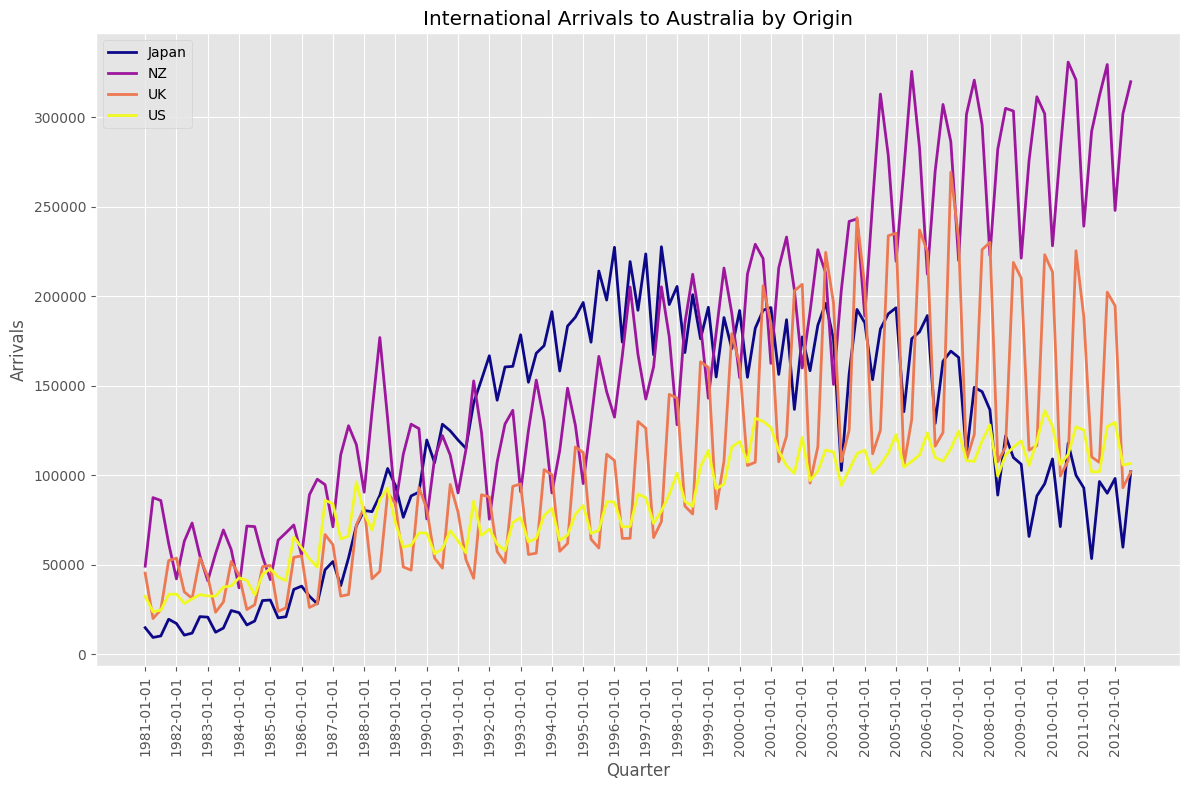

In [66]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

for idx, o in enumerate(origin):
    df = aus_arrivals.query(f'Origin == "{o}"')
    ax.plot(df['Quarter'], df['Arrivals'], label=o, c=cmap(idx/(len(origin)-1)), lw=2)
    ax.set_xticks(df['Quarter'][::4], labels=df['Quarter'][::4], rotation=90)
    ax.set_title('International Arrivals to Australia by Origin')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Arrivals')
    ax.legend()

plt.tight_layout()
plt.show()

In [67]:
aus_arrivals['Year'] = pd.to_datetime(aus_arrivals['Quarter']).dt.year.astype(str)
aus_arrivals['Quarter'] = 'Q'+pd.to_datetime(aus_arrivals['Quarter']).dt.quarter.astype(str)
years = aus_arrivals['Year'].unique()
aus_arrivals['Quarter']

0      Q1
1      Q2
2      Q3
3      Q4
4      Q1
       ..
503    Q3
504    Q4
505    Q1
506    Q2
507    Q3
Name: Quarter, Length: 508, dtype: object

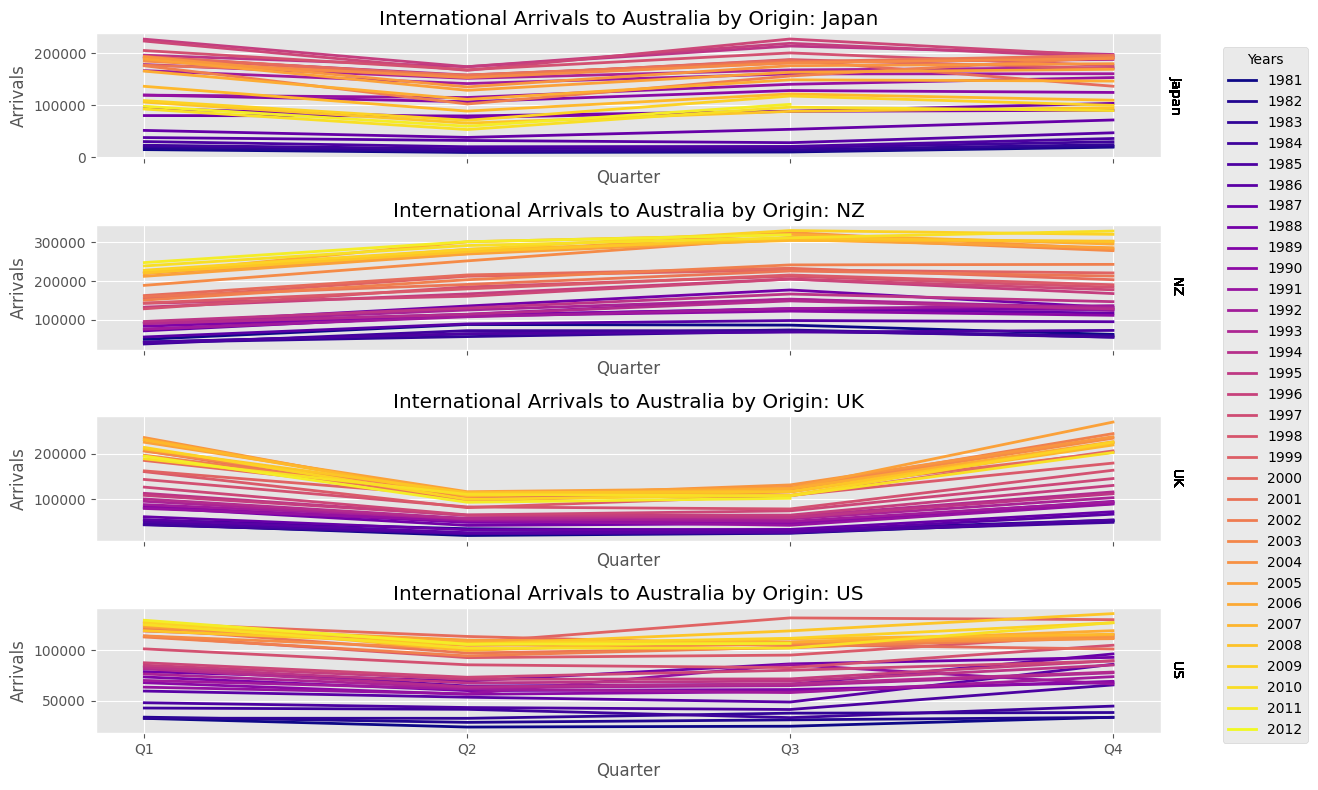

In [89]:
fig, axes = plt.subplots(nrows=len(origin), ncols=1, figsize=(12, 8), sharex=True)

for idx, o in enumerate(origin):
    ax = axes[idx]
    for jdx, y in enumerate(years):
        df = aus_arrivals.query(f'Origin == "{o}" and Year == "{y}"')
        ax.plot(df['Quarter'], df['Arrivals'], label=y, c=cmap(jdx/len(years)), lw=2)
        ax.text(1.02, 0.5, o, va="center", ha="right", rotation=270, fontsize=10, transform=ax.transAxes)
        ax.set_xlabel('Quarter')
        ax.set_ylabel('Arrivals')
        ax.set_title(f'International Arrivals to Australia by Origin: {o}')

handels = [plt.Line2D([0], [0], color=cmap(idx/(len(years)-1)), lw=2) for idx in range(len(years))]
labels = years
fig.legend(handels, labels, title='Years', loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

In [91]:
quarters = aus_arrivals['Quarter'].unique()

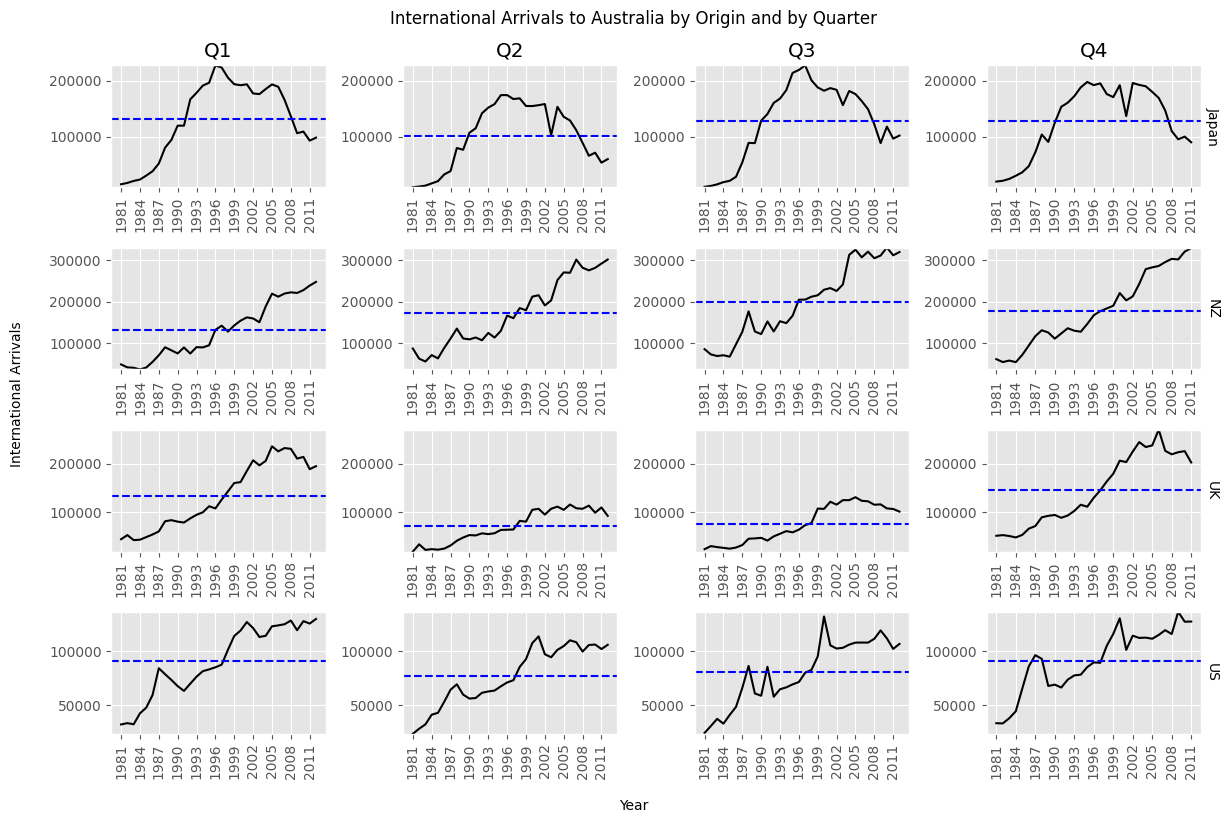

In [127]:
fig, axes = plt.subplots(nrows=len(origin), ncols=len(quarters), figsize=(12, 8))

for idx, o in enumerate(origin):
    dfo = aus_arrivals.query(f'Origin == "{o}"')
    y_min = dfo['Arrivals'].min()
    y_max = dfo['Arrivals'].max()
    for jdx, q in enumerate(quarters):
        ax = axes[idx, jdx]
        df = dfo.query(f'Quarter == "{q}"')
        ax.plot(df['Year'], df['Arrivals'], c='k')
        ax.axhline(y=df['Arrivals'].mean(), c='b', ls='--')
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(df['Year'][::3], labels=df['Year'][::3], rotation=90)


for i in range(len(quarters)):
    axes[0, i].set_title(quarters[i])

axes = axes.flatten()
for i in range(len(origin)):
     axes[i*4+3].text(1.02, 0.5, origin[i], va="center", ha="left", rotation=270, transform=axes[i*4+3].transAxes)

fig.text(0.5, -0.02, 'Year', ha='center')
fig.text(-0.02, 0.5, 'International Arrivals', va='center', rotation=90)
fig.suptitle(f'International Arrivals to Australia by Origin and by Quarter')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
plt.style.use('ggplot')

In [4]:
aus_retail = pd.read_csv('fpppy_data/data/aus_retail.csv')
aus_retail.head()

State                                  Industry  \
0  Australian Capital Territory  Cafes, restaurants and catering services   
1  Australian Capital Territory  Cafes, restaurants and catering services   
2  Australian Capital Territory  Cafes, restaurants and catering services   
3  Australian Capital Territory  Cafes, restaurants and catering services   
4  Australian Capital Territory  Cafes, restaurants and catering services   

   Series ID       Month  Turnover  
0  A3349849A  1982-04-01       4.4  
1  A3349849A  1982-05-01       3.4  
2  A3349849A  1982-06-01       3.6  
3  A3349849A  1982-07-01       4.0  
4  A3349849A  1982-08-01       3.6

In [5]:
np.random.seed(42)
random_series_id = np.random.choice(aus_retail['Series ID'].unique(), 1)[0]
myseries = aus_retail.query('`Series ID` == @random_series_id')
myseries

State                                           Industry  Series ID  \
43300  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43301  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43302  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43303  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43304  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
...         ...                                                ...        ...   
43736  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43737  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43738  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43739  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   
43740  Tasmania  Furniture, floor coverings, houseware and text...  A3349916R   

            Month  Turnover  
43300  1982-04-01       6.1  
43301  1982-05-01       6.3  
43302  1982-06-01       6.4  
43303  1982-07-01       5.9  
43304  1982-08-01       5.7  
...           ...       ...  
43736  2018-08-01      27.3  
43737  2018-09-01      24.8  
43738  2018-10-01      29.1  
43739  2018-11-01      27.6  
43740  2018-12-01      31.3  

[441 rows x 5 columns]

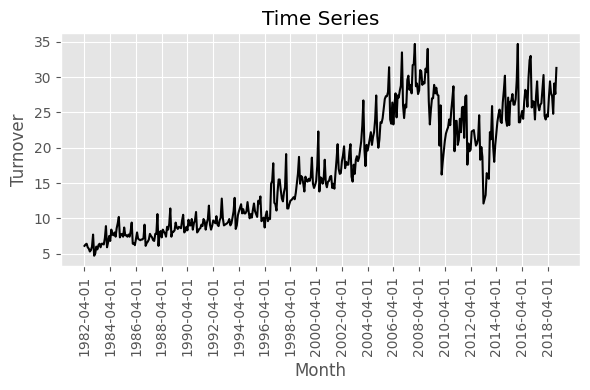

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(myseries['Month'], myseries['Turnover'], c='k')
ax.set_title('Time Series')
ax.set_xlabel('Month')
ax.set_ylabel('Turnover')
ax.set_xticks(myseries['Month'][::24], labels=myseries['Month'][::24], rotation=90)

plt.tight_layout()
plt.show()

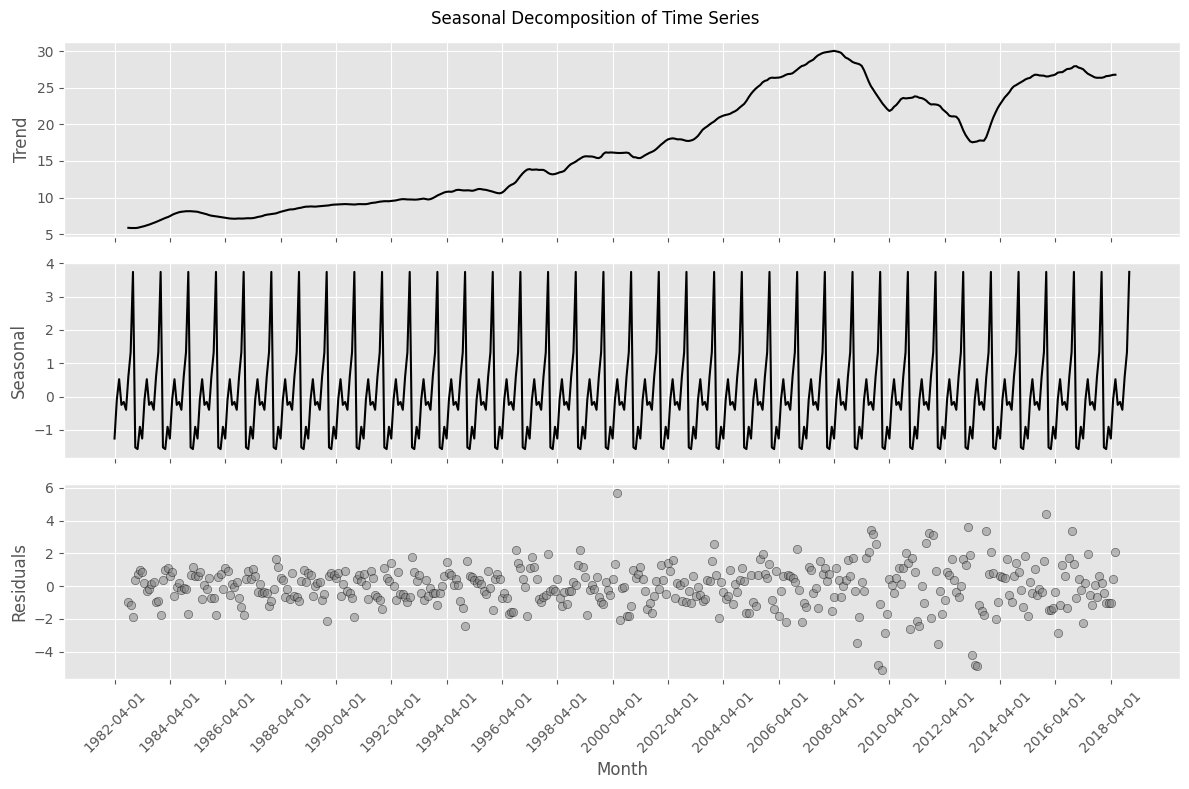

In [7]:
result = seasonal_decompose(myseries['Turnover'], model='additive', period=12)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(myseries['Month'], result.trend, c='k')
axes[0].set_ylabel('Trend')

axes[1].plot(myseries['Month'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')

axes[2].scatter(myseries['Month'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')

axes[2].set_xlabel('Month')
axes[2].set_xticks(myseries['Month'][::24], labels=myseries['Month'][::24], rotation=45)

fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()

In [22]:
myseries['Month Name'] = pd.to_datetime(myseries['Month']).dt.strftime('%B')
months = myseries['Month Name'].unique()
cmap = plt.cm.plasma

C:\Users\shivk\AppData\Local\Temp\ipykernel_18224\1274339920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myseries['Month Name'] = pd.to_datetime(myseries['Month']).dt.strftime('%B')


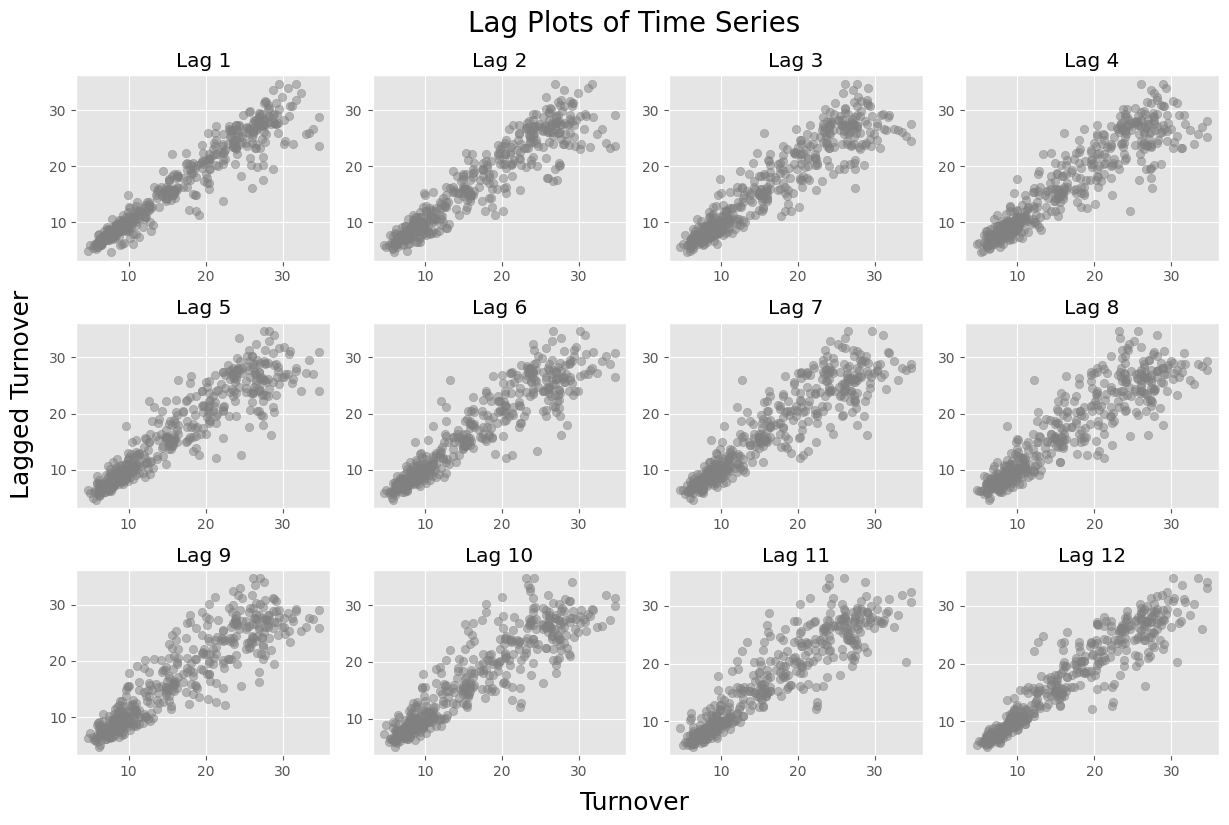

In [57]:
a = np.arange(12)
shape = np.reshape(a, (3, 4)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))
for idx, lag in enumerate(a):
    ax = axes[indices[idx]]
    pd.plotting.lag_plot(myseries['Turnover'], lag=lag+1, c='gray', fc='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, -0.02, 'Turnover', ha='center', fontsize=18)
fig.text(-0.02, 0.5, 'Lagged Turnover', va='center', rotation=90, fontsize=18)
fig.suptitle('Lag Plots of Time Series', fontsize=20)

plt.tight_layout()
plt.show()


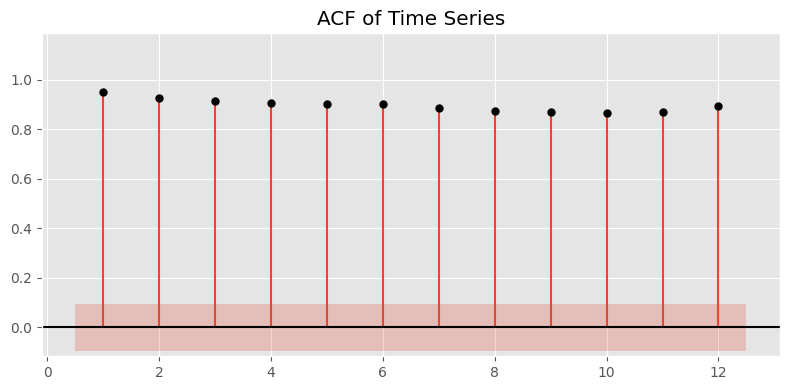

In [87]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()

plot_acf(myseries['Turnover'], lags=12, alpha=0.05, c='k', title='ACF of Time Series', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

for line in ax.get_lines():
    line.set_markerfacecolor('k')
    line.set_markeredgecolor('k')

plt.tight_layout()
plt.show()

From the above analysis, we can say:

1. There is a up trend.
2. There is cycle of little rise in the start of the years then a small fall and then again a big rise.
3. Consecutive months and month are strongly correlated, while others are also positively correlated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use('ggplot')

In [3]:
us_employment_total_private = pd.read_csv('fpppy_data/data/us_employment.csv').query('`unique_id` == "Total Private"').filter(['ds', 'y'])
aus_production_bricks = pd.read_csv('fpppy_data/data/aus_production.csv').filter(['ds', 'Bricks']).rename({'Bricks': 'y'}, axis=1)
pelt_hare = pd.read_csv('fpppy_data/data/pelt.csv').query('unique_id == "hare"').filter(['ds', 'y'])
pbs_ho2 = pd.read_csv('fpppy_data/data/pbs.csv').query('ATC2 == "H02"').filter(['Month', 'Cost']).rename({'Month': 'ds', 'Cost': 'y'}, axis=1)
us_gasoline = pd.read_csv('fpppy_data/data/us_gasoline.csv').filter(['ds', 'y'])

In [4]:
us_employment_total_private['y'] = us_employment_total_private['y'].fillna(us_employment_total_private['y'].mean())
aus_production_bricks['y'] = aus_production_bricks['y'].fillna(aus_production_bricks['y'].mean())
pelt_hare['y'] = pelt_hare['y'].fillna(pelt_hare['y'].mean())
pbs_ho2['y'] = pbs_ho2['y'].fillna(pbs_ho2['y'].mean())
us_gasoline['y'] = us_gasoline['y'].fillna(us_gasoline['y'].mean())

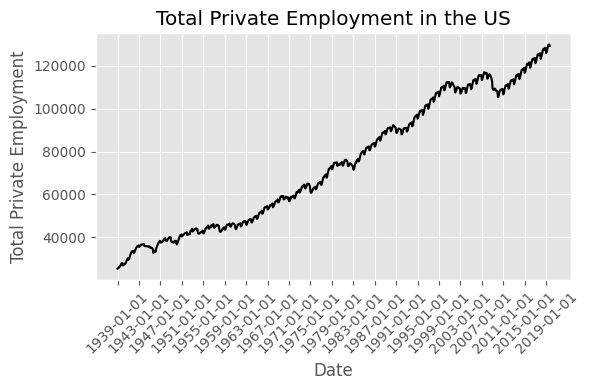

In [5]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(us_employment_total_private['ds'], us_employment_total_private['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Total Private Employment')
ax.set_title('Total Private Employment in the US')
ax.set_xticks(us_employment_total_private['ds'][::48], labels=us_employment_total_private['ds'][::48], rotation=45)

plt.tight_layout()
plt.show()

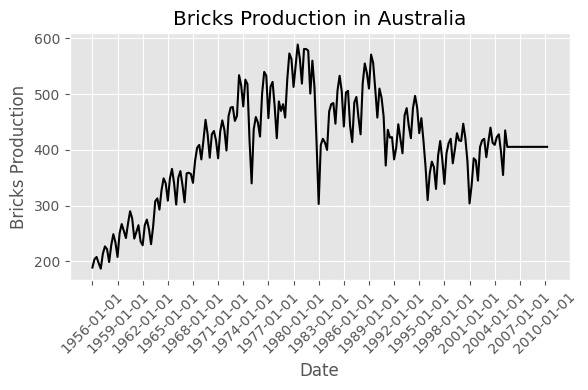

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(aus_production_bricks['ds'], aus_production_bricks['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Bricks Production')
ax.set_title('Bricks Production in Australia')
ax.set_xticks(aus_production_bricks['ds'][::12], labels=aus_production_bricks['ds'][::12], rotation=45)

plt.tight_layout()
plt.show()

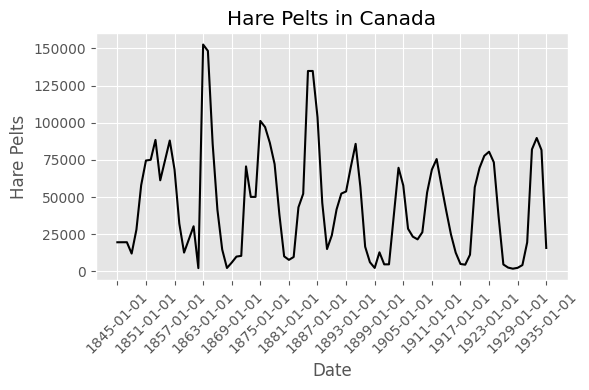

In [7]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(pelt_hare['ds'], pelt_hare['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Hare Pelts')
ax.set_title('Hare Pelts in Canada')
ax.set_xticks(pelt_hare['ds'][::6], labels=pelt_hare['ds'][::6], rotation=45)

plt.tight_layout()
plt.show()

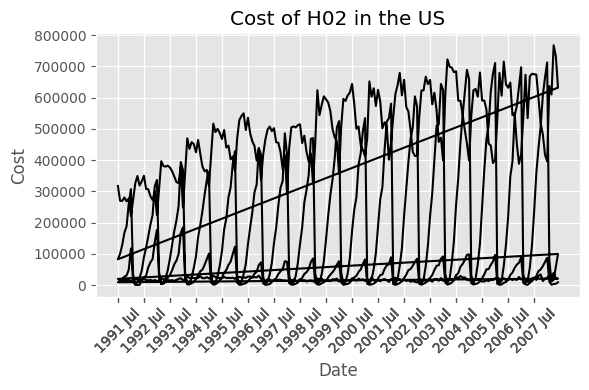

In [8]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(pbs_ho2['ds'], pbs_ho2['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Cost')
ax.set_title('Cost of H02 in the US')
ax.set_xticks(pbs_ho2['ds'][::12], labels=pbs_ho2['ds'][::12], rotation=45)

plt.tight_layout()
plt.show()

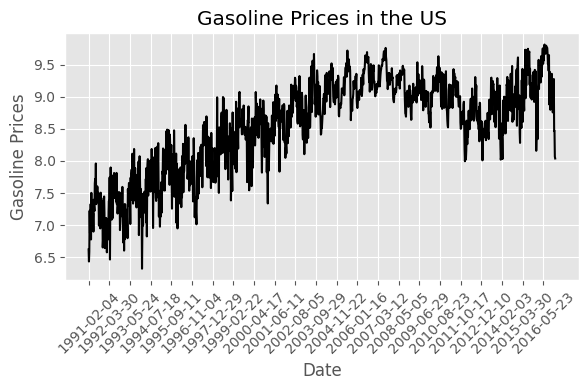

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(us_gasoline['ds'], us_gasoline['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Gasoline Prices')
ax.set_title('Gasoline Prices in the US')
ax.set_xticks(us_gasoline['ds'][::60], labels=us_gasoline['ds'][::60], rotation=45)

plt.tight_layout()
plt.show()

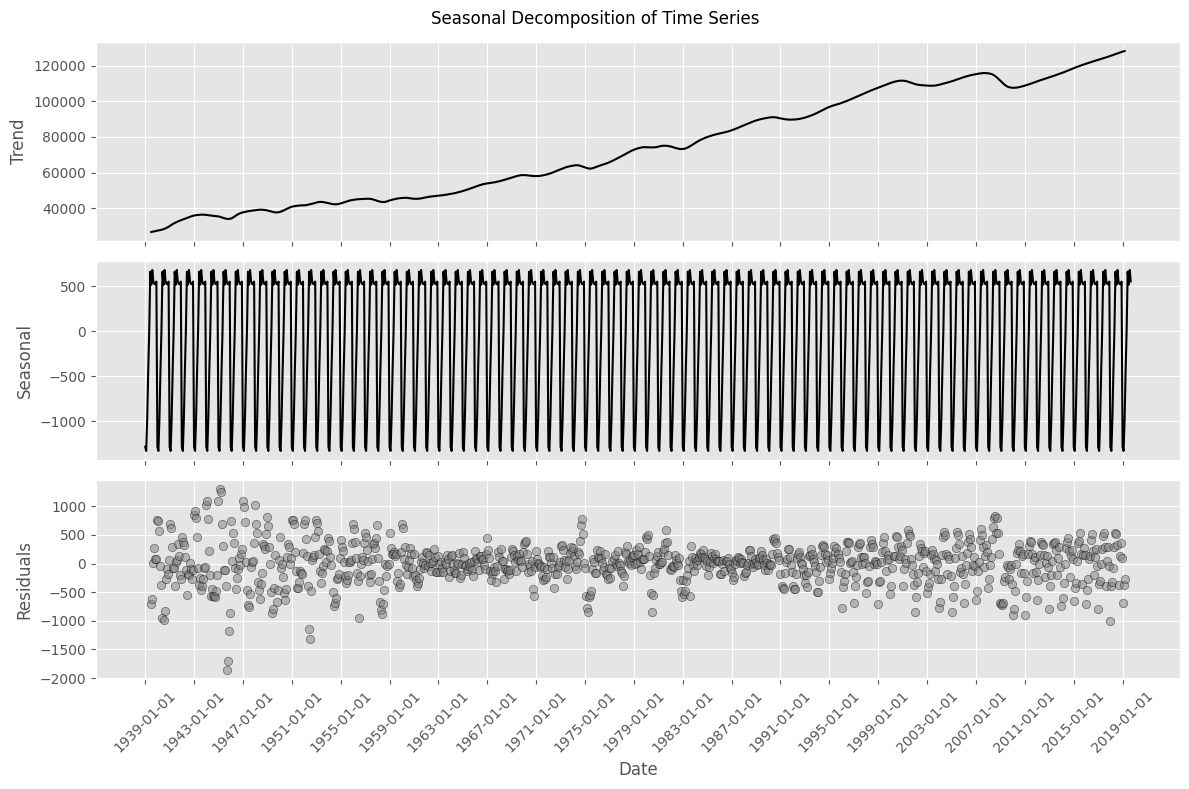

In [10]:
result = seasonal_decompose(us_employment_total_private['y'], model='additive', period=12)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(us_employment_total_private['ds'], result.trend, c='k')
axes[0].set_ylabel('Trend')
axes[1].plot(us_employment_total_private['ds'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')
axes[2].scatter(us_employment_total_private['ds'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')

axes[2].set_xlabel('Date')

axes[2].set_xticks(us_employment_total_private['ds'][::48], labels=us_employment_total_private['ds'][::48], rotation=45)
fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()

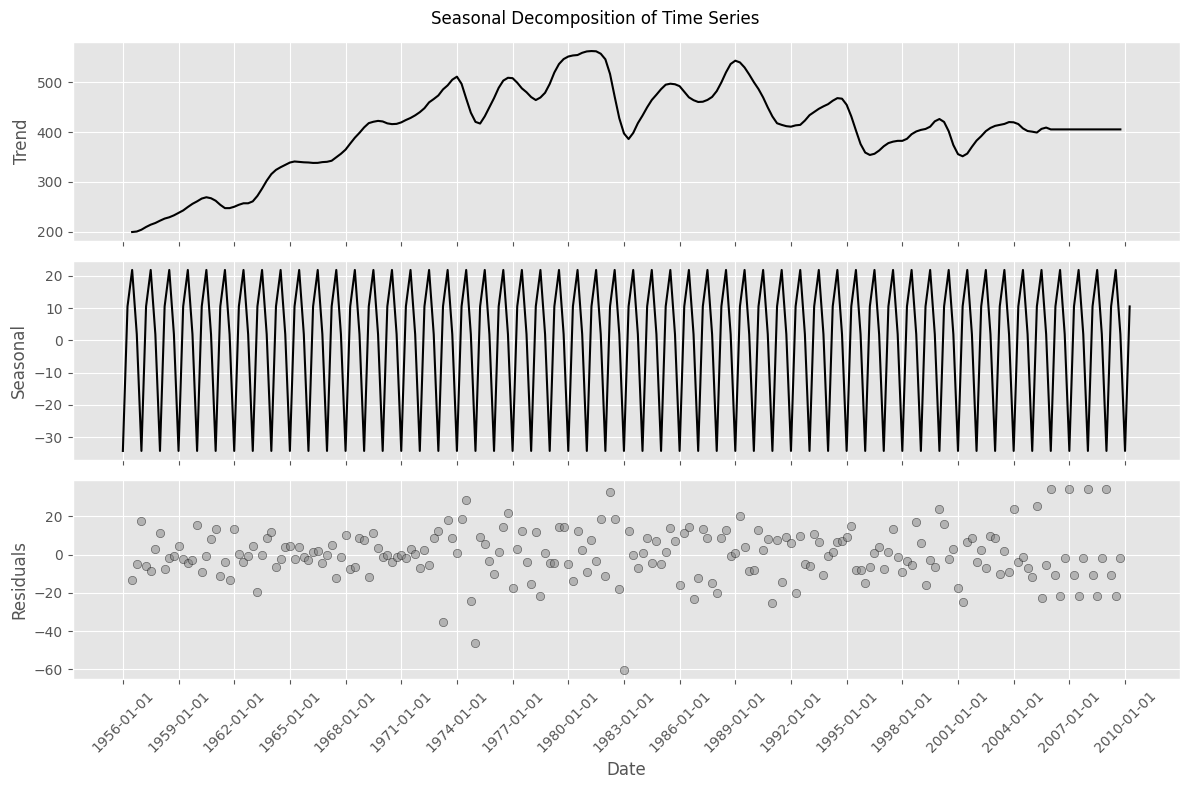

In [11]:
result = seasonal_decompose(aus_production_bricks['y'], model='additive', period=4)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(aus_production_bricks['ds'], result.trend, c='k')
axes[0].set_ylabel('Trend')
axes[1].plot(aus_production_bricks['ds'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')
axes[2].scatter(aus_production_bricks['ds'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')

axes[2].set_xlabel('Date')

axes[2].set_xticks(aus_production_bricks['ds'][::12], labels=aus_production_bricks['ds'][::12], rotation=45)
fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()

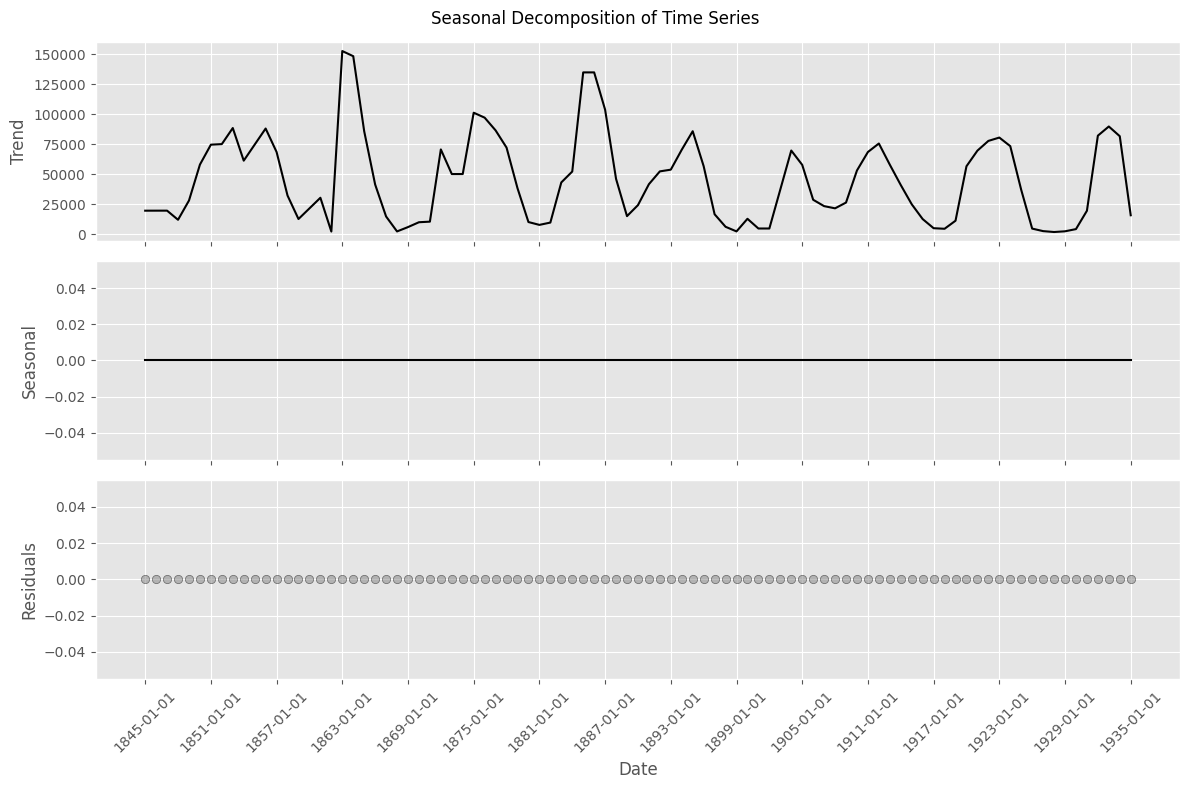

In [12]:
result = seasonal_decompose(pelt_hare['y'], model='additive', period=1)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(pelt_hare['ds'], result.trend, c='k')
axes[0].set_ylabel('Trend')
axes[1].plot(pelt_hare['ds'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')
axes[2].scatter(pelt_hare['ds'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')
axes[2].set_xlabel('Date')

axes[2].set_xticks(pelt_hare['ds'][::6], labels=pelt_hare['ds'][::6], rotation=45)
fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()

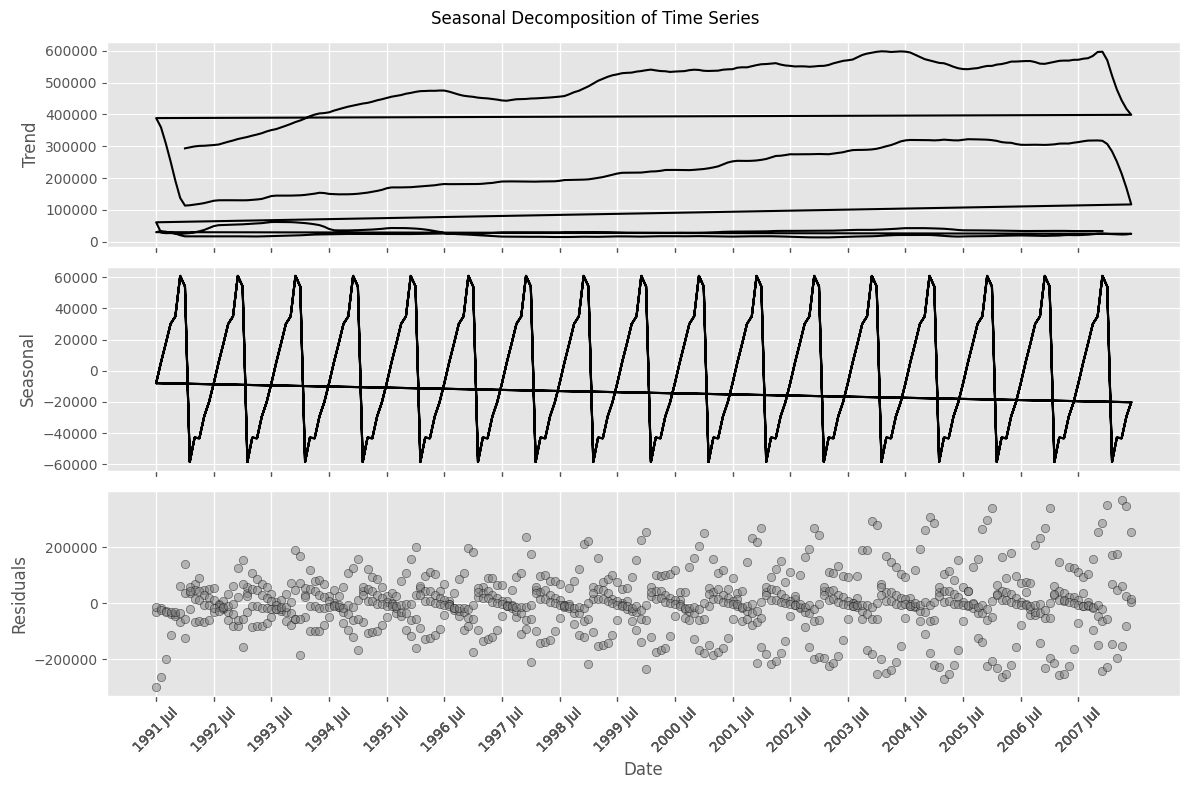

In [13]:
result = seasonal_decompose(pbs_ho2['y'], model='additive', period=12)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(pbs_ho2['ds'], result.trend, c='k')
axes[0].set_ylabel('Trend')
axes[1].plot(pbs_ho2['ds'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')
axes[2].scatter(pbs_ho2['ds'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')
axes[2].set_xlabel('Date')

axes[2].set_xticks(pbs_ho2['ds'][::12], labels=pbs_ho2['ds'][::12], rotation=45)

fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()


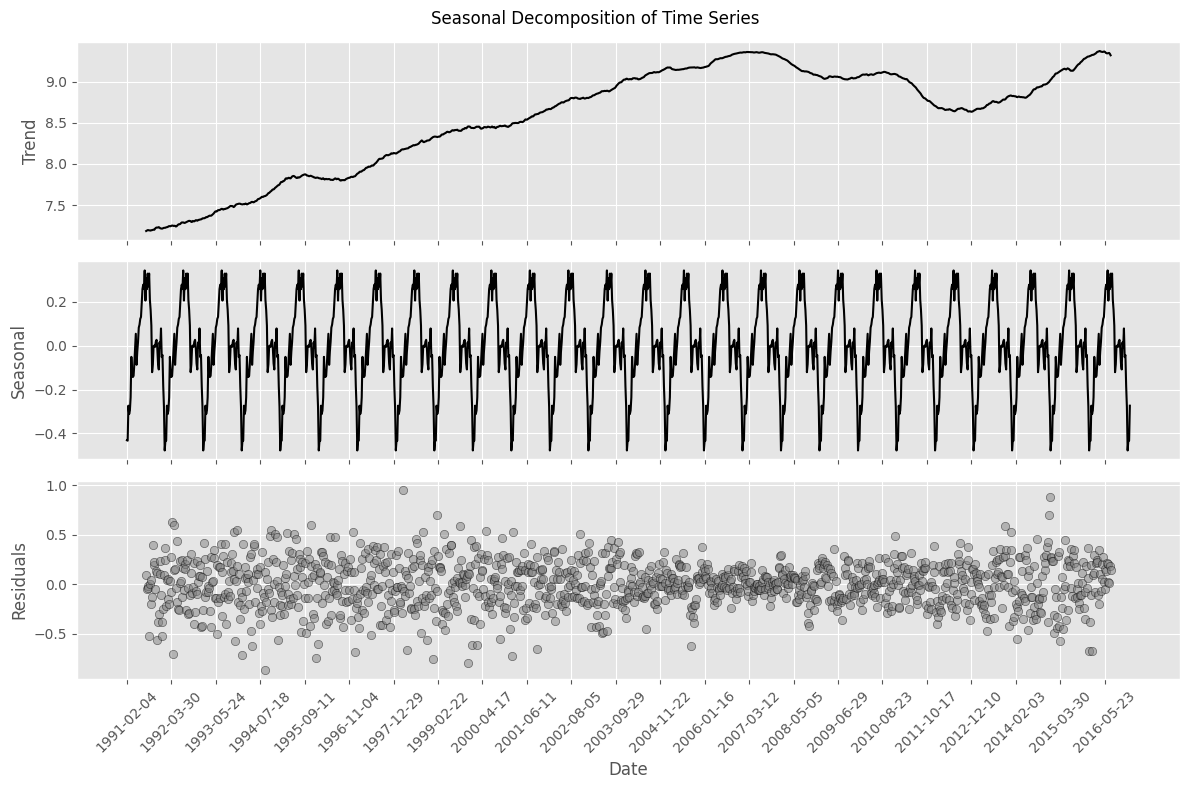

In [14]:
result = seasonal_decompose(us_gasoline['y'], model='additive', period=52)

fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(us_gasoline['ds'], result.trend, c='k')
axes[0].set_ylabel('Trend')
axes[1].plot(us_gasoline['ds'], result.seasonal, c='k')
axes[1].set_ylabel('Seasonal')
axes[2].scatter(us_gasoline['ds'], result.resid, fc='gray', ec='k', alpha=0.5)
axes[2].set_ylabel('Residuals')
axes[2].set_xlabel('Date')
axes[2].set_xticks(us_gasoline['ds'][::60], labels=us_gasoline['ds'][::60], rotation=45)

fig.suptitle('Seasonal Decomposition of Time Series')

plt.tight_layout()
plt.show()

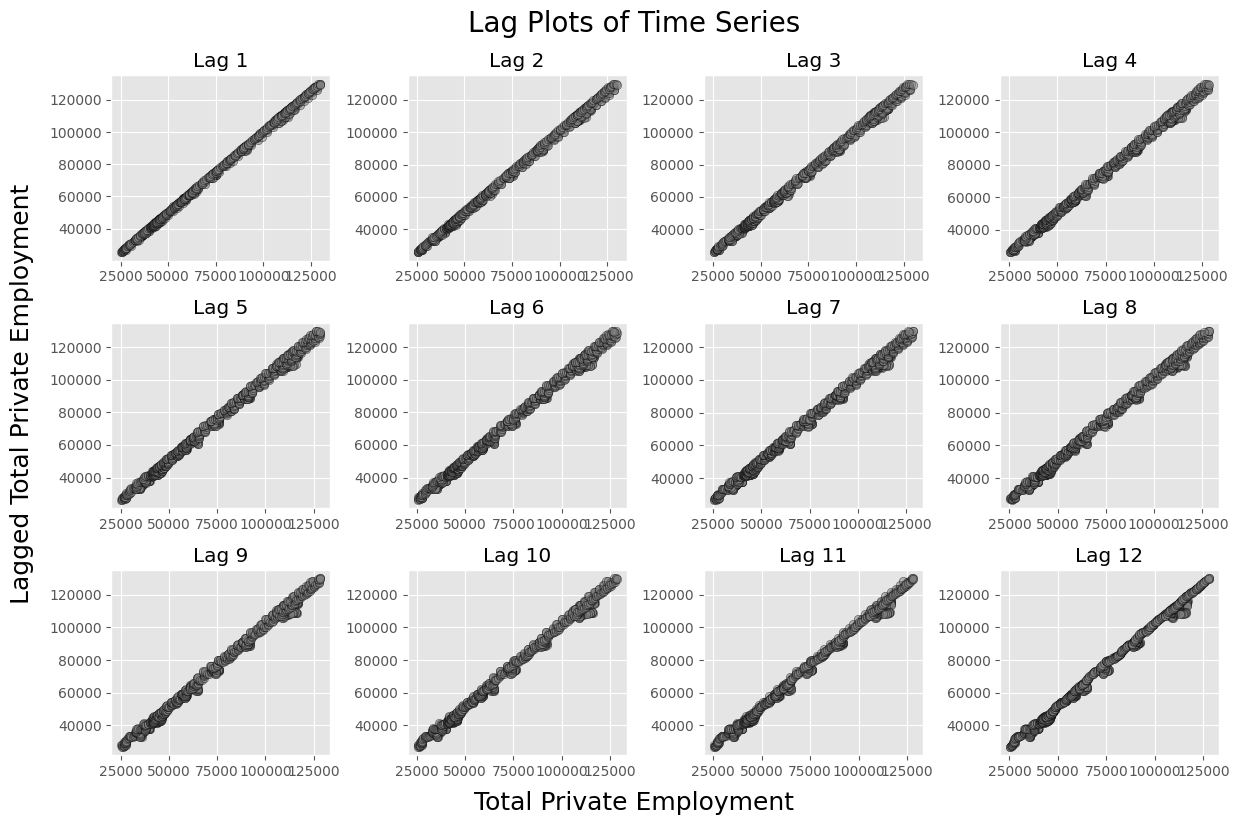

In [37]:
a = np.arange(12)
shape = np.reshape(a, (3, 4)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))
fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))

for idx, lag in enumerate(a):
    ax = axes[indices[idx]]
    pd.plotting.lag_plot(us_employment_total_private['y'], lag=lag+1, c='gray', ec='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, -0.02, 'Total Private Employment', ha='center', fontsize=18)
fig.text(-0.02, 0.5, 'Lagged Total Private Employment', va='center', rotation=90, fontsize=18)

fig.suptitle('Lag Plots of Time Series', fontsize=20)
plt.tight_layout()
plt.show()

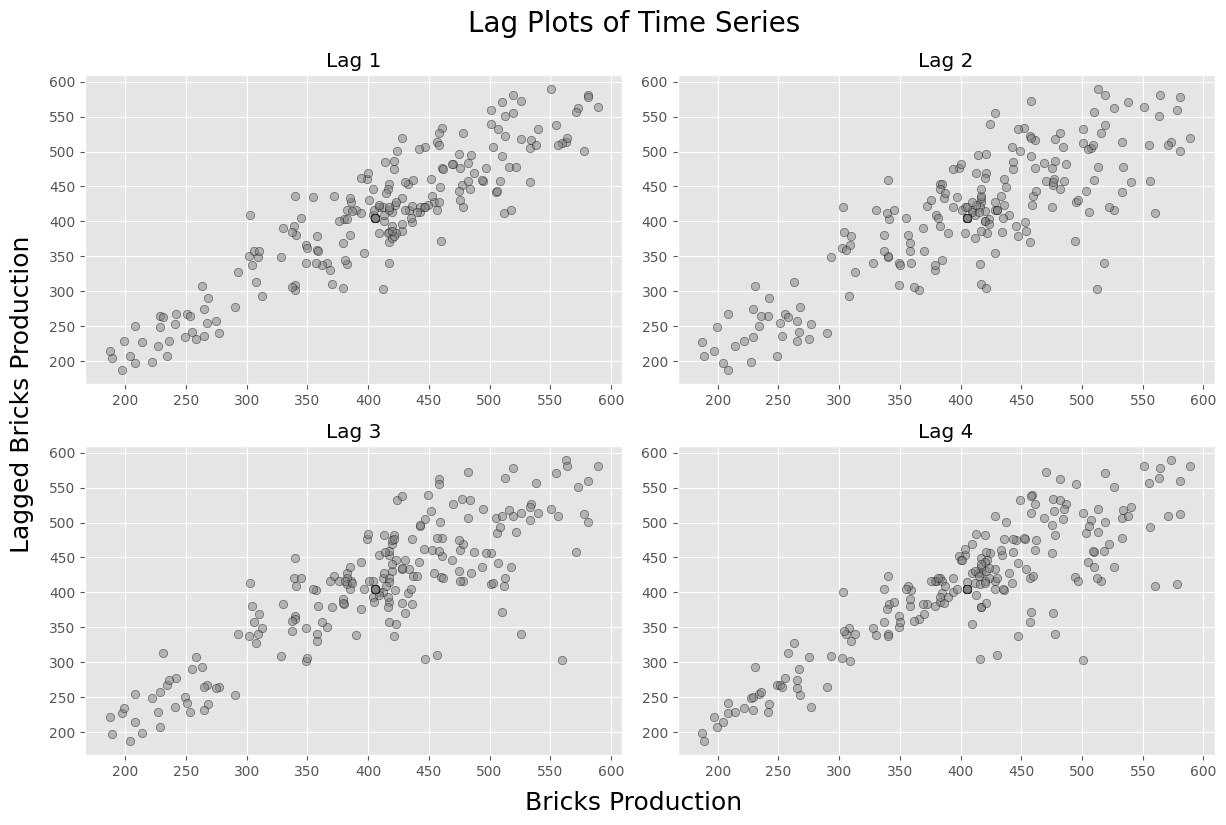

In [38]:
a = np.arange(4)
shape = np.reshape(a, (2, -1)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))
fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))
for idx, lag in enumerate(a):
    ax = axes[indices[idx]]
    pd.plotting.lag_plot(aus_production_bricks['y'], lag=lag+1, c='gray', ec='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, -0.02, 'Bricks Production', ha='center', fontsize=18)
fig.text(-0.02, 0.5, 'Lagged Bricks Production', va='center', rotation=90, fontsize=18)
fig.suptitle('Lag Plots of Time Series', fontsize=20)
plt.tight_layout()
plt.show()


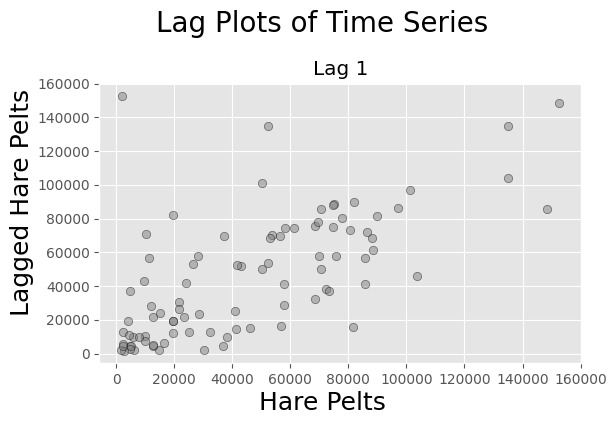

In [39]:
a = np.arange(1)
shape = np.reshape(a, (1, -1)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
for idx, lag in enumerate(a):
    pd.plotting.lag_plot(pelt_hare['y'], lag=lag+1, c='gray', ec='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, -0.02, 'Hare Pelts', ha='center', fontsize=18)
fig.text(-0.02, 0.5, 'Lagged Hare Pelts', va='center', rotation=90, fontsize=18)
fig.suptitle('Lag Plots of Time Series', fontsize=20)
plt.tight_layout()
plt.show()

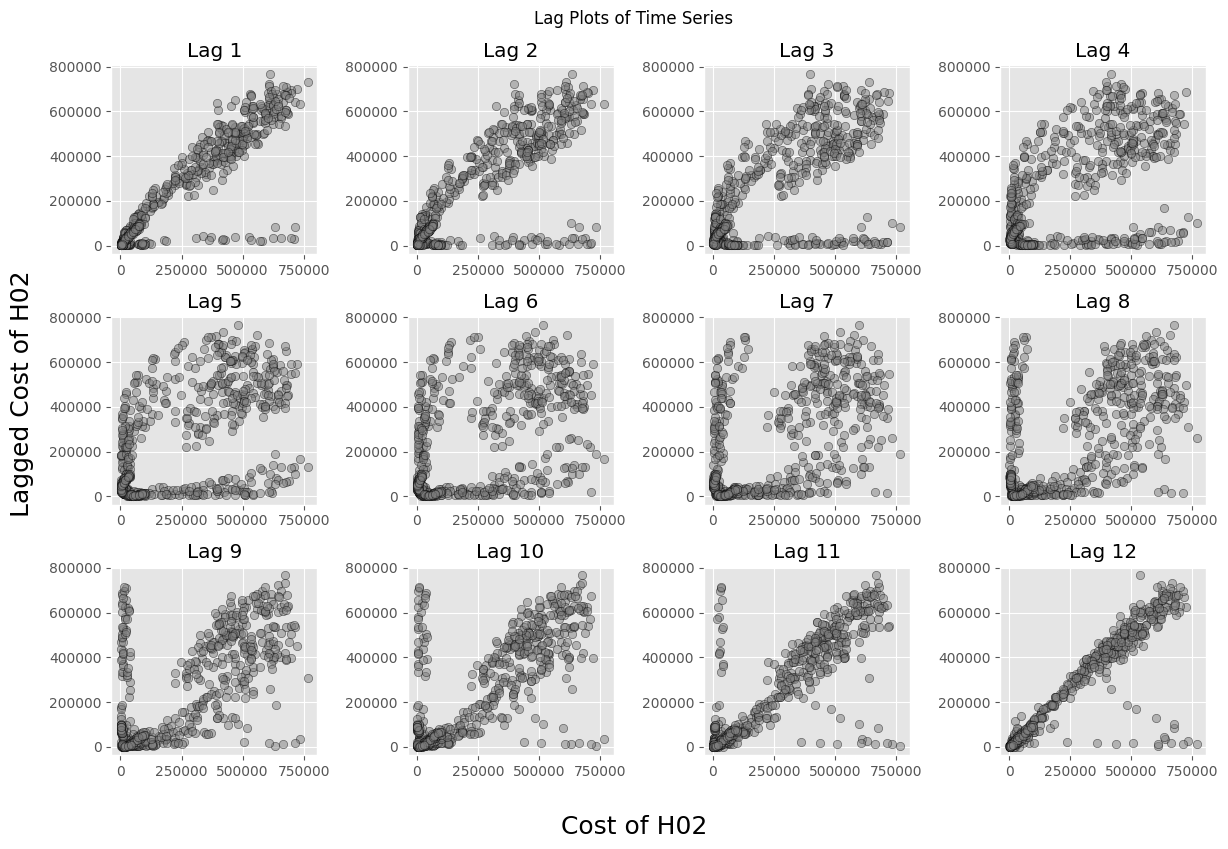

In [40]:
a = np.arange(12)
shape = np.reshape(a, (3, -1)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))

for idx, lag in enumerate(a):
    ax = axes[indices[idx]]
    pd.plotting.lag_plot(pbs_ho2['y'], lag=lag+1, c='gray', ec='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, -0.05, 'Cost of H02', ha='center', fontsize=18)
fig.text(-0.02 , 0.5, 'Lagged Cost of H02', va='center', rotation=90, fontsize=18)

fig.suptitle('Lag Plots of Time Series', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\shivk\AppData\Local\Temp\ipykernel_19896\1465555232.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


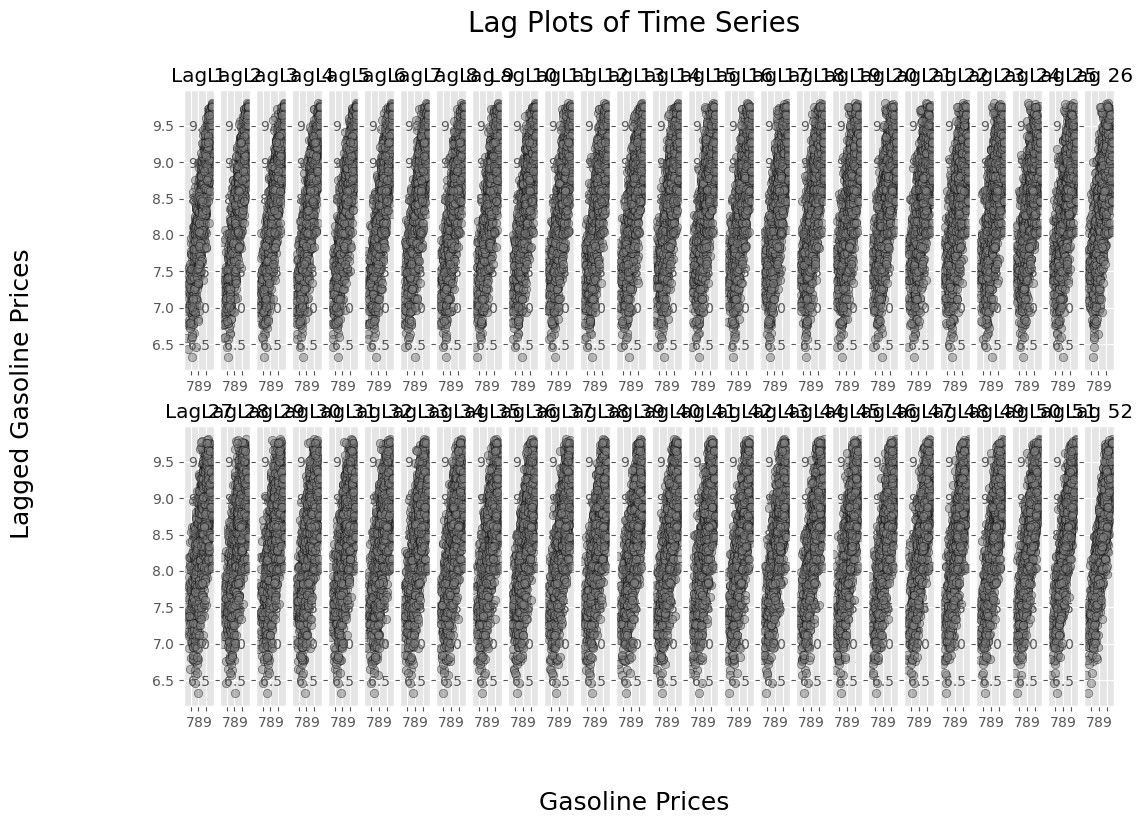

In [41]:
a = np.arange(52)
shape = np.reshape(a, (2, -1)).shape
indices = np.unravel_index(a, shape=shape)
indices = list(zip(*indices))
fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))
for idx, lag in enumerate(a):
    ax = axes[indices[idx]]
    pd.plotting.lag_plot(us_gasoline['y'], lag=lag+1, c='gray', ec='k', alpha=0.5, ax=ax)
    ax.set_title(f'Lag {lag+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, -0.02, 'Gasoline Prices', ha='center', fontsize=18)
fig.text(-0.02, 0.5, 'Lagged Gasoline Prices', va='center', rotation=90, fontsize=18)
fig.suptitle('Lag Plots of Time Series', fontsize=20)
plt.tight_layout()
plt.show()

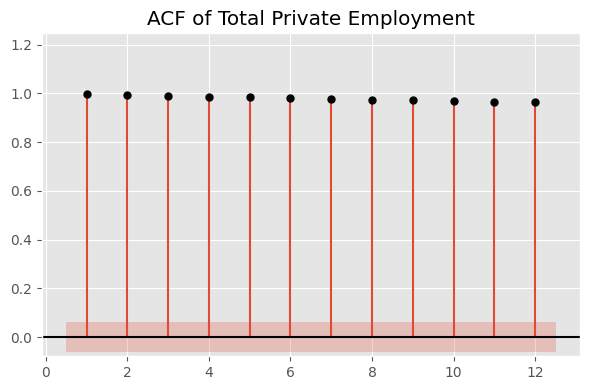

In [44]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()


plot_acf(us_employment_total_private['y'], lags=12, alpha=0.05, c='k', title='ACF of Total Private Employment', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()

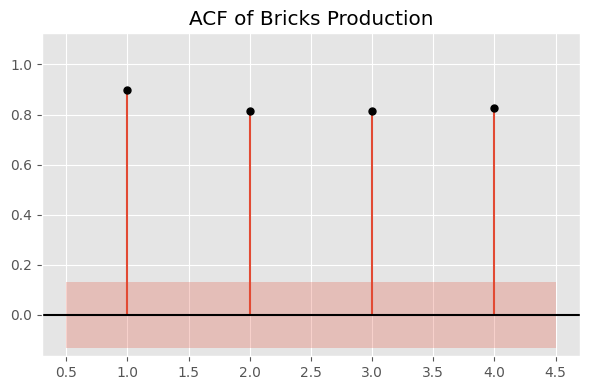

In [53]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

plot_acf(aus_production_bricks['y'], lags=4, alpha=0.05, c='k', title='ACF of Bricks Production', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()

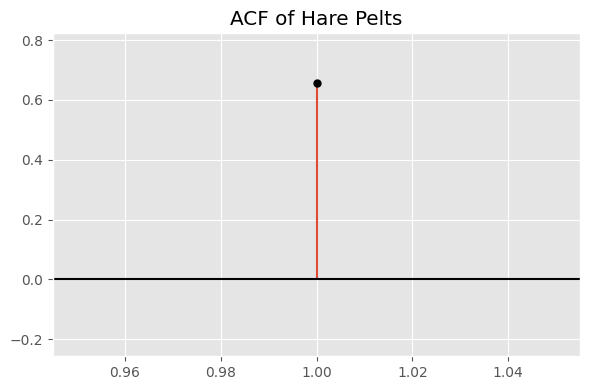

In [54]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
plot_acf(pelt_hare['y'], lags=1, alpha=0.05, c='k', title='ACF of Hare Pelts', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()

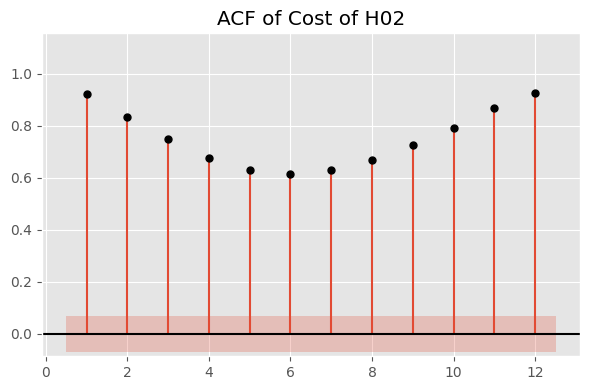

In [55]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

plot_acf(pbs_ho2['y'], lags=12, alpha=0.05, c='k', title='ACF of Cost of H02', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()

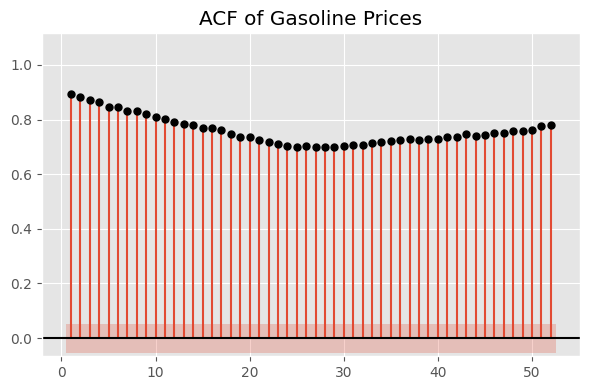

In [56]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
plot_acf(us_gasoline['y'], lags=52, alpha=0.05, c='k', title='ACF of Gasoline Prices', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()

* Seasonality, cyclicity and trend are easily detactable for all the time series except for the Hare Pelt series.
* For most of the time series, the adjancent periods and the period after a year have correlated values.
* Seasonal patterns are repeated on yearly basis for all the time series except for the Hare Pelt series.
* 1946, 1983, None, 2007 and 2015 are some unsual years for each time series respectily based on the residual plot plotted in the decomposition.

In [18]:
import pandas as pd
import numpy as np
from  statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [19]:
aus_livestock = pd.read_csv('fpppy_data/data/aus_livestock.csv')
aus_livestock.head()

unique_id          ds       y
0  Australian Capital Territory_Bulls, bullocks a...  1976-07-01  2300.0
1  Australian Capital Territory_Bulls, bullocks a...  1976-08-01  2100.0
2  Australian Capital Territory_Bulls, bullocks a...  1976-09-01  2100.0
3  Australian Capital Territory_Bulls, bullocks a...  1976-10-01  1900.0
4  Australian Capital Territory_Bulls, bullocks a...  1976-11-01  2100.0

In [20]:
aus_livestock['ds'] = pd.to_datetime(aus_livestock['ds'])

In [23]:
aus_livestock_1990_1995 = aus_livestock.query('`ds` >= "1990" & `ds` <= "1995"').filter(['ds', 'y'])
aus_livestock_1990_1995 = aus_livestock_1990_1995.sort_values(by='ds')

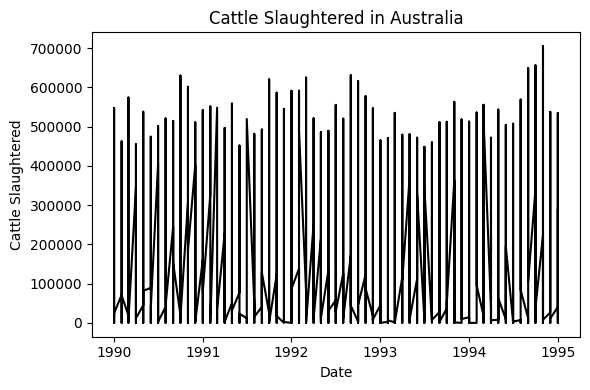

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(pd.to_datetime(aus_livestock_1990_1995['ds']), aus_livestock_1990_1995['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Cattle Slaughtered')
ax.set_title('Cattle Slaughtered in Australia')

plt.tight_layout()
plt.show()

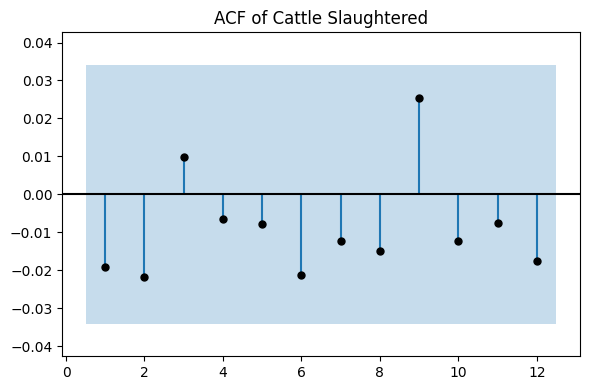

In [27]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

plot_acf(aus_livestock_1990_1995['y'], lags=12, alpha=0.05, c='k', title='ACF of Cattle Slaughtered', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()


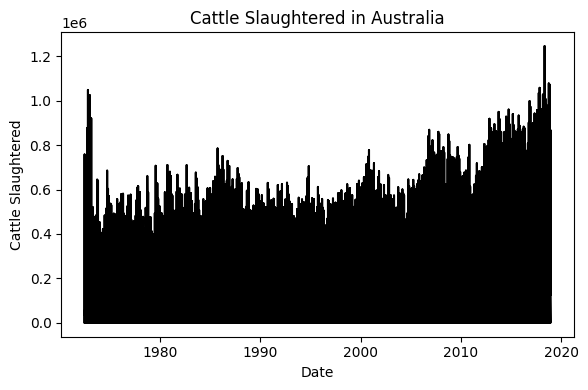

In [29]:
aus_livestock = aus_livestock.sort_values(by='ds')

fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(pd.to_datetime(aus_livestock['ds']), aus_livestock['y'], c='k')
ax.set_xlabel('Date')
ax.set_ylabel('Cattle Slaughtered')
ax.set_title('Cattle Slaughtered in Australia')

plt.tight_layout()
plt.show()

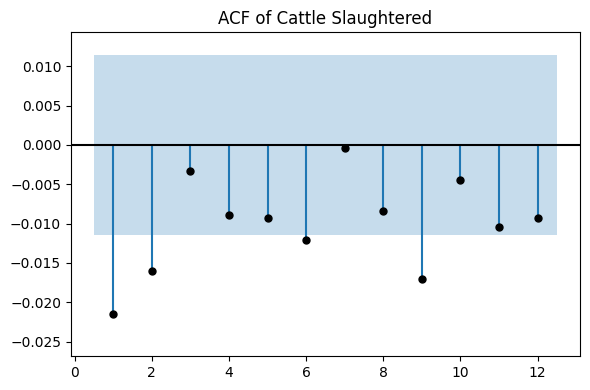

In [30]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

plot_acf(aus_livestock['y'], lags=12, alpha=0.05, c='k', title='ACF of Cattle Slaughtered', ax=ax, zero=False, bartlett_confint=False, auto_ylims=True)

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [18]:
plt.style.use('ggplot')

In [4]:
stock = pd.read_csv('fpppy_data\data\gafa_stock.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivk\AppData\Local\Temp\ipykernel_28052\1671027861.py:1: SyntaxWarning: invalid escape sequence '\d'
  stock = pd.read_csv('fpppy_data\data\gafa_stock.csv')


In [5]:
dgoog =  stock.query('unique_id == "GOOG_Close" & ds >= "2018"')
dgoog['trading_day'] = np.arange(1, len(dgoog) + 1)
dgoog['diff'] = dgoog['y'].diff()
dgoog.set_index('trading_day', inplace=True)

C:\Users\shivk\AppData\Local\Temp\ipykernel_28052\2927554701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgoog['trading_day'] = np.arange(1, len(dgoog) + 1)
C:\Users\shivk\AppData\Local\Temp\ipykernel_28052\2927554701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgoog['diff'] = dgoog['y'].diff()


In [7]:
dgoog

unique_id          ds            y       diff
trading_day                                                
1            GOOG_Close  2018-01-02  1065.000000        NaN
2            GOOG_Close  2018-01-03  1082.479980  17.479980
3            GOOG_Close  2018-01-04  1086.400024   3.920044
4            GOOG_Close  2018-01-05  1102.229980  15.829956
5            GOOG_Close  2018-01-08  1106.939941   4.709961
...                 ...         ...          ...        ...
247          GOOG_Close  2018-12-24   976.219971  -3.320007
248          GOOG_Close  2018-12-26  1039.459961  63.239990
249          GOOG_Close  2018-12-27  1043.880005   4.420044
250          GOOG_Close  2018-12-28  1037.079956  -6.800049
251          GOOG_Close  2018-12-31  1035.609985  -1.469971

[251 rows x 4 columns]

In [9]:
dgoog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 1 to 251
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  251 non-null    object 
 1   ds         251 non-null    object 
 2   y          251 non-null    float64
 3   diff       250 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.8+ KB


* Reseting the index was necessary because we filtered only some of the rows from the full file. 

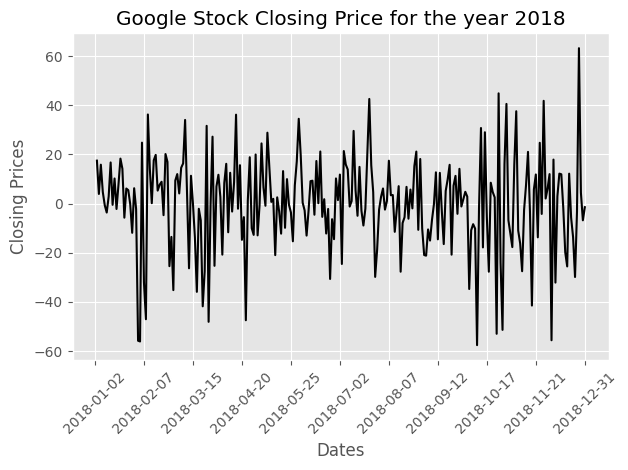

In [19]:
fig = plt.figure()
ax = fig.gca()

ax.plot(dgoog['ds'], dgoog['diff'], c='k')
ax.set_xticks(dgoog['ds'][::25], dgoog['ds'][::25], rotation=45)
ax.set_xlabel('Dates')
ax.set_ylabel('Closing Prices')
ax.set_title('Google Stock Closing Price for the year 2018')

plt.tight_layout()
plt.show()

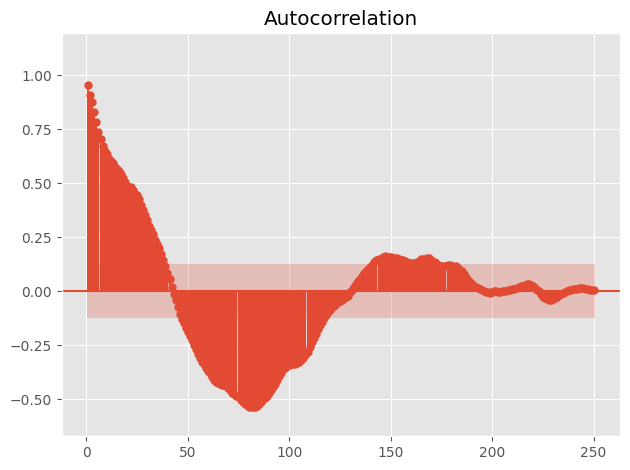

In [28]:
fig = plt.figure()
ax = fig.gca()

plot_acf(dgoog['y'], ax=ax, lags=250, bartlett_confint=False, zero=False, auto_ylims=True)

plt.tight_layout()
plt.show()

* No, changes in the closing price is not a white noice.